## Kickstarter | classification

#### Ouali Jughurta

dataset ==> https://www.kaggle.com/kemical/kickstarter-projects

In [1693]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1694]:
data = pd.read_csv('ks-projects-201801.csv', encoding='utf-8')


### EDA (analyse et exploration de données)

In [1695]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [1590]:
data.shape

(378661, 15)

In [1591]:
#df = data.sample(15000, random_state=500).reset_index().drop('index', axis=1)
df = data.copy()

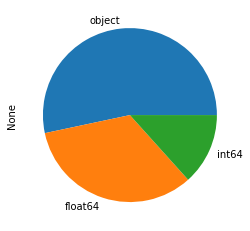

In [1592]:
df.dtypes.value_counts().plot.pie()

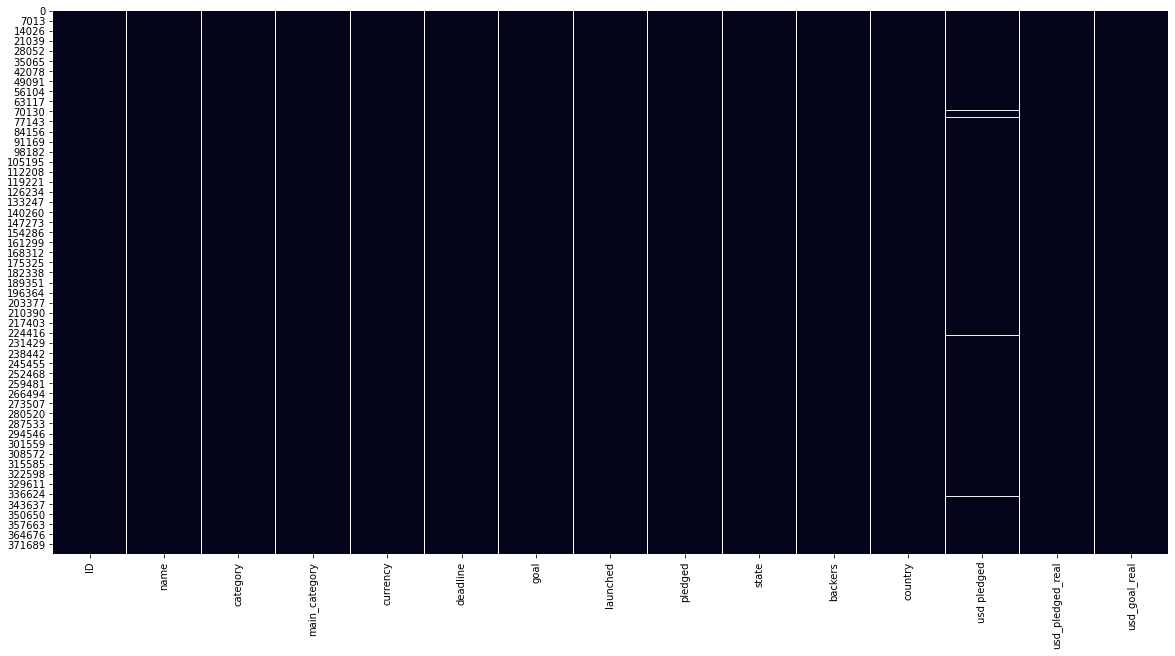

In [1593]:
# crée une visualisation pour le jeu de données pour mieux voir les valeurs

plt.figure(figsize=(20,10))

sns.heatmap(df.isna(), cbar=False)

In [1594]:
# afficher la somme des NaN de tt le
# c'est une dataset qui a très peu de valeur manquante
(df.isna().sum()/df.shape[0]).sort_values()

ID                  0.000000
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd_pledged_real    0.000000
usd_goal_real       0.000000
name                0.000011
usd pledged         0.010027
dtype: float64



## 1 visualisation et elimination des colonnes intilles 

In [1595]:
# supprimer également ID ça nous sert a rien

df = df.drop(['ID', 'usd pledged'], axis=1)

In [1596]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

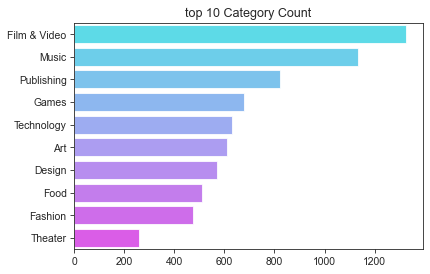

In [1710]:
sns.set_style('ticks')
mains = df.main_category.value_counts().head(10)

x = mains.values
y = mains.index

fig = plt.figure(dpi=75)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', palette="cool", alpha=0.8)

plt.title('top 10 Category Count')
plt.show()

In [1598]:
for col in df.select_dtypes('float'):
    print(col)

goal
pledged
usd_pledged_real
usd_goal_real


In [1599]:
for col in df.select_dtypes('object'):
    print(col)

name
category
main_category
currency
deadline
launched
state
country


In [1600]:
df['state'].value_counts(normalize=True)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

### relation entre target/catégorie

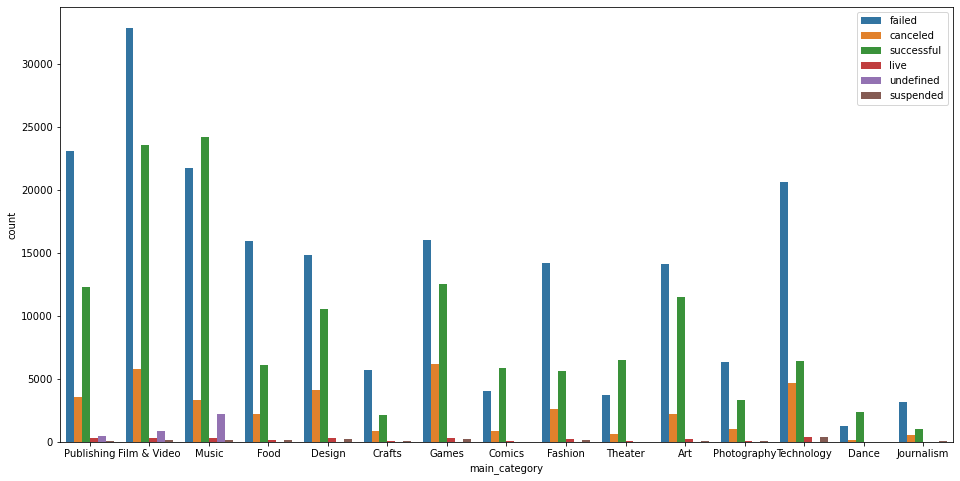

In [1601]:
plt.figure(figsize=(16,8))
sns.countplot(x = 'main_category', hue='state', data=df)
plt.legend()

In [1607]:
df_1 = df[(df['state'] == 'failed') | (df['state'] == 'successful')]

In [1608]:
df = df_1.copy()

In [1609]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,50000.00


In [1459]:
# classes légerement désiquilibré
df['state'].value_counts(normalize=True)

failed        0.596123
successful    0.403877
Name: state, dtype: float64

### Création des sous-ensembles (Apres EDA)

In [1610]:
df = data.sample(9000, random_state=500).reset_index().drop('index', axis=1)
df = df.copy()

## Preprocessing

In [1611]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [1612]:
# selection de variable pertinantes pour notre target
#df.loc[df['state'] == 'canceled', 'state'] = -1
df = df[['category','main_category','country','currency','state', 'usd_goal_real']]
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')]

In [1613]:
df.head()

,category,main_category,country,currency,state,usd_goal_real
0,Photography,Photography,US,USD,failed,16000.00
1,Tabletop Games,Games,GB,GBP,successful,11605.95
2,Documentary,Film & Video,US,USD,failed,3500.00
3,Ready-to-wear,Fashion,GB,GBP,successful,679.38
4,Video Games,Games,US,USD,successful,12300.00


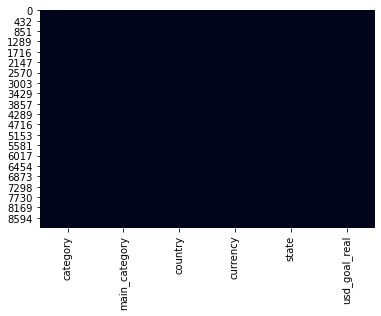

In [1614]:
# pas de valeur manquante (NaN)
sns.heatmap(df.isna(), cbar=False)

In [1615]:
(df.isna().sum()/df.shape[0]).sort_values()

category         0.0
main_category    0.0
country          0.0
currency         0.0
state            0.0
usd_goal_real    0.0
dtype: float64

### TrainTest Split - Nettoyage - Encodage

In [1616]:
# encoding

df.loc[df['state'] == 'failed', 'state'] = 0
df.loc[df['state'] == 'successful', 'state'] = 1

# pipeline pour la starndardiser StandardScaler + OneHotEncoder à utilisé dans la partie Modélisation

numeric_features = make_column_selector(dtype_include=np.number)
cat_features = make_column_selector(dtype_exclude=np.number)

numeric_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))
trans_preprocessor = make_column_transformer((numeric_pipeline, numeric_features), (cat_pipeline, cat_features))

In [1617]:
train_X, test_X, train_y, test_y = train_test_split(df.drop('state', axis=1), df['state'].astype('int'), 
                                                    test_size=0.3, random_state=100)


In [1618]:
df.head()

,category,main_category,country,currency,state,usd_goal_real
0,Photography,Photography,US,USD,0,16000.00
1,Tabletop Games,Games,GB,GBP,1,11605.95
2,Documentary,Film & Video,US,USD,0,3500.00
3,Ready-to-wear,Fashion,GB,GBP,1,679.38
4,Video Games,Games,US,USD,1,12300.00


### Méthode d'Evaluation

In [1711]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

# transformer test_y et train_y en intéger
test_y = test_y.astype('int')
train_y=train_y.astype('int')

def evaluation(model):
    
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))
    
    N, train_score, val_score = learning_curve(model, train_X, train_y, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label = 'score entrainement')
    plt.plot(N, val_score.mean(axis=1), label= 'score validation')

# Modelisation

In [1713]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# StandardScaler c'est un normalizeur des données il est necessaire pour certain algo comme SVM et KNN


In [1714]:

RandomForest = make_pipeline(trans_preprocessor, RandomForestClassifier(random_state=0))
SVM = make_pipeline(trans_preprocessor, SVC())
Dtree = make_pipeline(trans_preprocessor, DecisionTreeClassifier())
LR = make_pipeline(trans_preprocessor, LogisticRegression())
KNN = make_pipeline(trans_preprocessor, KNeighborsClassifier())
AdaBoostClassifier=make_pipeline(trans_preprocessor, AdaBoostClassifier())

dict_of_models = {'RandomForest': RandomForest,
                 'Logistic Regression':LR,
                 'Dtree':Dtree,
                 'SVM':SVM,
                 'KNN':KNN,
                 'AdaBoostClassifier': AdaBoostClassifier}

RandomForest
[[1013  426]
 [ 478  441]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1439
           1       0.51      0.48      0.49       919

    accuracy                           0.62      2358
   macro avg       0.59      0.59      0.59      2358
weighted avg       0.61      0.62      0.61      2358

curve learning for f-score
Logistic Regression
[[1135  304]
 [ 514  405]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1439
           1       0.57      0.44      0.50       919

    accuracy                           0.65      2358
   macro avg       0.63      0.61      0.62      2358
weighted avg       0.64      0.65      0.64      2358

curve learning for f-score
Dtree
[[1018  421]
 [ 510  409]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1439
           1       0.49      0.45      0.47       919

    accu

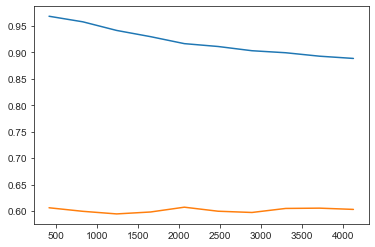

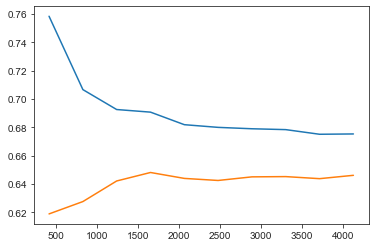

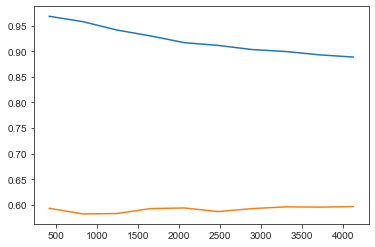

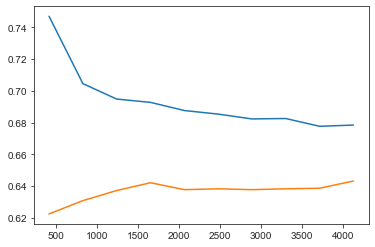

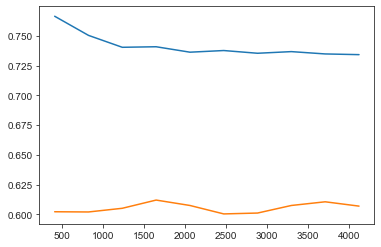

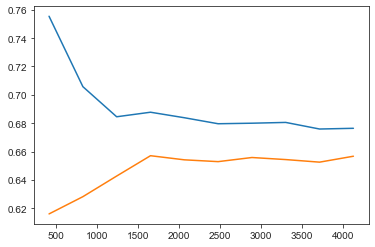

In [1716]:
# logiticR + SVM + AdB => convergence entre le train_score et val_scor (F-score)
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)
    print('curve learning for f-score')

In [1723]:
acc_RandomForest = round(RandomForest.score(test_X, test_y) * 100, 2)
acc_SVM = round(SVM.score(test_X, test_y) * 100, 2)
acc_Dtree = round(Dtree.score(test_X, test_y) * 100, 2)
acc_LR = round(LR.score(test_X, test_y) * 100, 2)
acc_KNN = round(KNN.score(test_X, test_y) * 100, 2)
acc_AdaBoostClassifier = round(AdaBoostClassifier.score(test_X, test_y) * 100, 2)

In [1724]:
models = pd.DataFrame({
    'Model': ['Random Forest',
              'Logistic Regression',    
              'SVC', 
              'Decision Tree',
              'KNN',
             'AdaBoostClassifier'],
    'Score': [acc_RandomForest, 
              acc_LR,
              acc_SVM,    
              acc_Dtree,
              acc_KNN,
              acc_AdaBoostClassifier]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,AdaBoostClassifier,66.58
1,Logistic Regression,65.31
2,SVC,65.27
0,Random Forest,61.66
4,KNN,60.56
3,Decision Tree,60.52


## Optimisation du modele

In [1680]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [1692]:
SVM

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001B081F72BE0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEn

In [1689]:
# essye de modifier les hyper paramétre
#sans succée
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000,6000]}

In [1690]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='accuracy', cv=4,
                          n_iter=20)

grid.fit(train_X, train_y)

print(grid.best_params_)

y_pred = grid.predict(test_X)

print(classification_report(test_y, y_pred))

C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'svc__gamma': 0.001, 'svc__C': 100}
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      1439
           1       0.58      0.39      0.47       919

    accuracy                           0.65      2358
   macro avg       0.63      0.61      0.61      2358
weighted avg       0.64      0.65      0.64      2358



[[1181  258]
 [ 559  360]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74      1439
           1       0.58      0.39      0.47       919

    accuracy                           0.65      2358
   macro avg       0.63      0.61      0.61      2358
weighted avg       0.64      0.65      0.64      2358



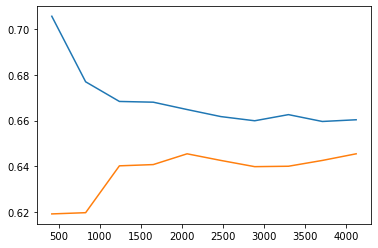

In [1691]:
evaluation(grid.best_estimator_)